# Transposed Convolution (обратные свёртки)




## Теория

Вы уже знакомы с понятием свёрточных слоёв, которые активно используются в задачах компьютерного зрения. Являясь методом регуляризации (каким-то дополнительны ограничением или условием для более корректной постановки задачи), они дают возможность учесть геометрические особенности данных типа изображений (и вообще данных с какой-то пространственной структурой) при построении скрытого представления.

Однако в задаче сегментации нам надо перевести полученное скрытое представление изображения в новое изображение. Одним из способов сделать это являются **обратные свёртки (transposed convolution)**. Принцип действия схож с обычными свёртками, тоже есть фильтр, который проходит по изображению и выдаёт на основе захваченных пикселов новую информацию. Только в случае с обратными свёртками выходное изображение увеличивается в размере, а не уменьшается.

В обычных свёртках для сохранения размера изображения вокруг него вставлялась рамка из пустых пикселов (padding), в обратной свёртке импользуется аналогичная идея: для увеличения картинки раздвинем пиксели, вставляя вокруг каждого из них нули, затем применим обычную свёртку.

Посмотрим, как меняется размер изображения при применении обратной свёртки. Сама обратная свёртка реализована в PyTorch как класс `torch.nn.ConvTranspose2d` (может быть и 1D и 3D). При создании объекта класса обратной свёртки нужно указать количество входных каналов (`in_channels`), выходных каналов (`out_channels`) и размер ядра свёртки (`kernel_size`). Также для регулирования размера выходного изображения есть параметры `padding`, `output_paddig`, `stride`. Снизу приведена илистрация работы обратной свёртки при разных параметрах.

_N.B.: Синие изображения - входы, бирюзовые - выходы._

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="250px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides_transposed.gif"></td>
    <td><img width="250px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/same_padding_no_strides_transposed.gif"></td>
    <td><img width="250px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/full_padding_no_strides_transposed.gif"></td>
  </tr>
  <tr>
    <td>padding = 0; stride = 1; output_padding=0</td>
    <td>padding = 1; stride = 1; output_padding=0</td>
    <td>padding = 2; stride = 1; output_padding=0</td>
  </tr>
  <tr>
    <td><img width="250px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_strides_transposed.gif"></td>
    <td><img width="250px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_transposed.gif"></td>
    <td><img width="250px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_odd_transposed.gif"></td>
  </tr>
  <tr>
    <td>padding = 0; stride = 2; output_padding=0</td>
    <td>padding = 1; stride = 2; output_padding=0</td>
    <td>padding = 1; stride = 2; output_padding=1</td>
  </tr>
</table>

Больше иллюстраций по [ссылке](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md)

In [1]:
import torch
import numpy as np

import torchvision.transforms as tt
from PIL import Image
import os

import matplotlib.pyplot as plt

from tqdm import tqdm
from IPython.display import clear_output # для отчистки экрана

In [2]:
torch.manual_seed(0)
np.random.seed(0)

Напишем функцию, которая инициализирует транспонированную свертку, и применяет ее к батчу изображений

In [3]:
def conv_transpose(img, padding=0, stride=1, output_padding=0):
    conv_t = torch.nn.ConvTranspose2d(in_channels=3, out_channels=3,
                                      kernel_size=3,
                                      padding=padding, stride=stride,
                                      output_padding=output_padding)

    return conv_t(img)

Посмотрим, как работает функция

In [6]:
img = torch.ones((1, 3, 2, 2))

In [7]:
conv_transpose(img).shape

torch.Size([1, 3, 4, 4])

### Задание

Для разных параметров `padding`, `stride` задайте и примените к изображению транспонированную свертку, а затем посмотрите на размер изображения.

* Как влияет увеличение паддинга на размер итогового изображения?
* Как влияет увеличение страйда на размер итогового изображения?
* Похоже ли такое поведение на поведение обычной свертки?

Посмотрим на параметр `padding`

In [8]:
img = torch.ones((1, 3, 32, 32))

In [ ]:
for padding in range(6):
    # ВЫВЕДИТЕ РАЗМЕР ПОЛУЧИВШЕГОСЯ ИЗОБРАЖЕНИЯ
    pass

**ВЫВОД**

Посмотрим на `stride`

In [ ]:
for stride in [1, 2, 3, 4]:
    # ВЫВЕДИТЕ РАЗМЕР ПОЛУЧИВШЕГОСЯ ИЗОБРАЖЕНИЯ
    pass

Поверьте, что произойдет с размером изображения, если `stride = kernel_size`.

**ВЫВОД**

### Задание

Посмотрим на то, как в pytorch работает последовательность операций свертки и транспонированной свертки с одинаковыми параметрами.

* Задайте свертку и транспонированную свертку с какими-нибудь параметрами `padding`, `stride`
* Сначала примените их в порядке `conv -> transposed_conv`
* Затем примените их в порядке `transposed_conv -> conv`
* Сделайте вывод и проверьте в случае произвольных `padding`, `stride`

In [ ]:
for padding in range(10):
  for stride in range(1, 10):
    conv = <задание свертки с разным padding и stride>
    transposed_conv = <задание транспонированной свертки с разным padding и stride>
    conved = <применение операций в нужном порядке>
    assert conved.shape == img.shape

**ВЫВОД**

----
Как вы увидели, в  `pytorch` транспонированная свертка реализована так, чтобы сохранять размер изображения при применении операций свертки и транспонированной свертки в определенном порядке (теперь вы знаете в каком :) ).

При такой реализации возникает сложность. При использовании обычной свёртки со значением `stride` больше единицы может получится одинаковая выходная форма для разных входных. Например

In [ ]:
img1 = torch.randn((3, 32, 32))
img2 = torch.randn((3, 31, 31))

In [ ]:
conv = torch.nn.Conv2d(in_channels=3, out_channels=3,
                       kernel_size=3, stride=2, padding=1)

In [ ]:
conv(img1).shape

torch.Size([3, 16, 16])

In [ ]:
conv(img2).shape

torch.Size([3, 16, 16])

Для того, чтобы устранить эту неопределённость при использовании обратной свёртки используют параметр `output_padding`. Он добавляет полоски заданной толщины к двум соседним сторонам (это не просто полоски, заполненные нулями!). Должен быть меньше, чем значение `stride`.

In [ ]:
transposed_conv1 = torch.nn.ConvTranspose2d(in_channels=3, out_channels=3,
                                            kernel_size=3, stride=2,
                                            padding=1, output_padding=1)

In [ ]:
transposed_conv1(conv(img1)).shape

torch.Size([3, 32, 32])

In [ ]:
transposed_conv2 = torch.nn.ConvTranspose2d(in_channels=3, out_channels=3,
                                            kernel_size=3, stride=2,
                                            padding=1, output_padding=0)

In [ ]:
transposed_conv2(conv(img2)).shape

torch.Size([3, 31, 31])

При этом если применять операции в обратном порядке (обратная свёртка -> свёртка) с одинаковыми параметрами, то всё работает как надо (создатели PyTorch специально так сделали)


In [ ]:
transposed_conv = torch.nn.ConvTranspose2d(in_channels=3, out_channels=3,
                                           kernel_size=3, stride=2, padding=1)

In [ ]:
conv(transposed_conv(img1)).shape

torch.Size([3, 32, 32])

In [ ]:
conv(transposed_conv(img2)).shape

torch.Size([3, 31, 31])

Общая формула выхода обратной свёртки:

$$
    H_{out} = (H_{in} - 1) \cdot \text{stride[0]} - 2 \cdot \text{padding[0]} + \text{kernal size[0]} + \text{output padding[0]}
$$

$$
    W_{out} = (W_{in} - 1) \cdot \text{stride[1]} - 2 \cdot \text{padding[1]} + \text{kernal size[1]} + \text{output padding[1]}
$$

### Задание

Увеличьте размер изображения в два раза с помощью обратной свёртки, используя результат предыдущего задания.

In [ ]:
img = torch.ones((1, 3, 64, 64))

In [ ]:
# ваш код

### Задание

Используя результат из предыдущего задания, реализуйте небольшой прототип сети, которая принимает на вход картинку (3, 32, 32) и возвращает картинку (3, 32, 32). Будем использовать только 2 операции:

* nn.Conv2d - обычная свертка
* nn.ConvTranspose2d - транспонированная свертка

Архитектура свети будет типа `Encoder-Decoder`, где Encoder будет сжимать исходное изображение одновременно с увеличением каналов, а Decoder это изображение разжимать до исходного размера.

Преобразования `Encoder` должны выглядеть следующим образом:

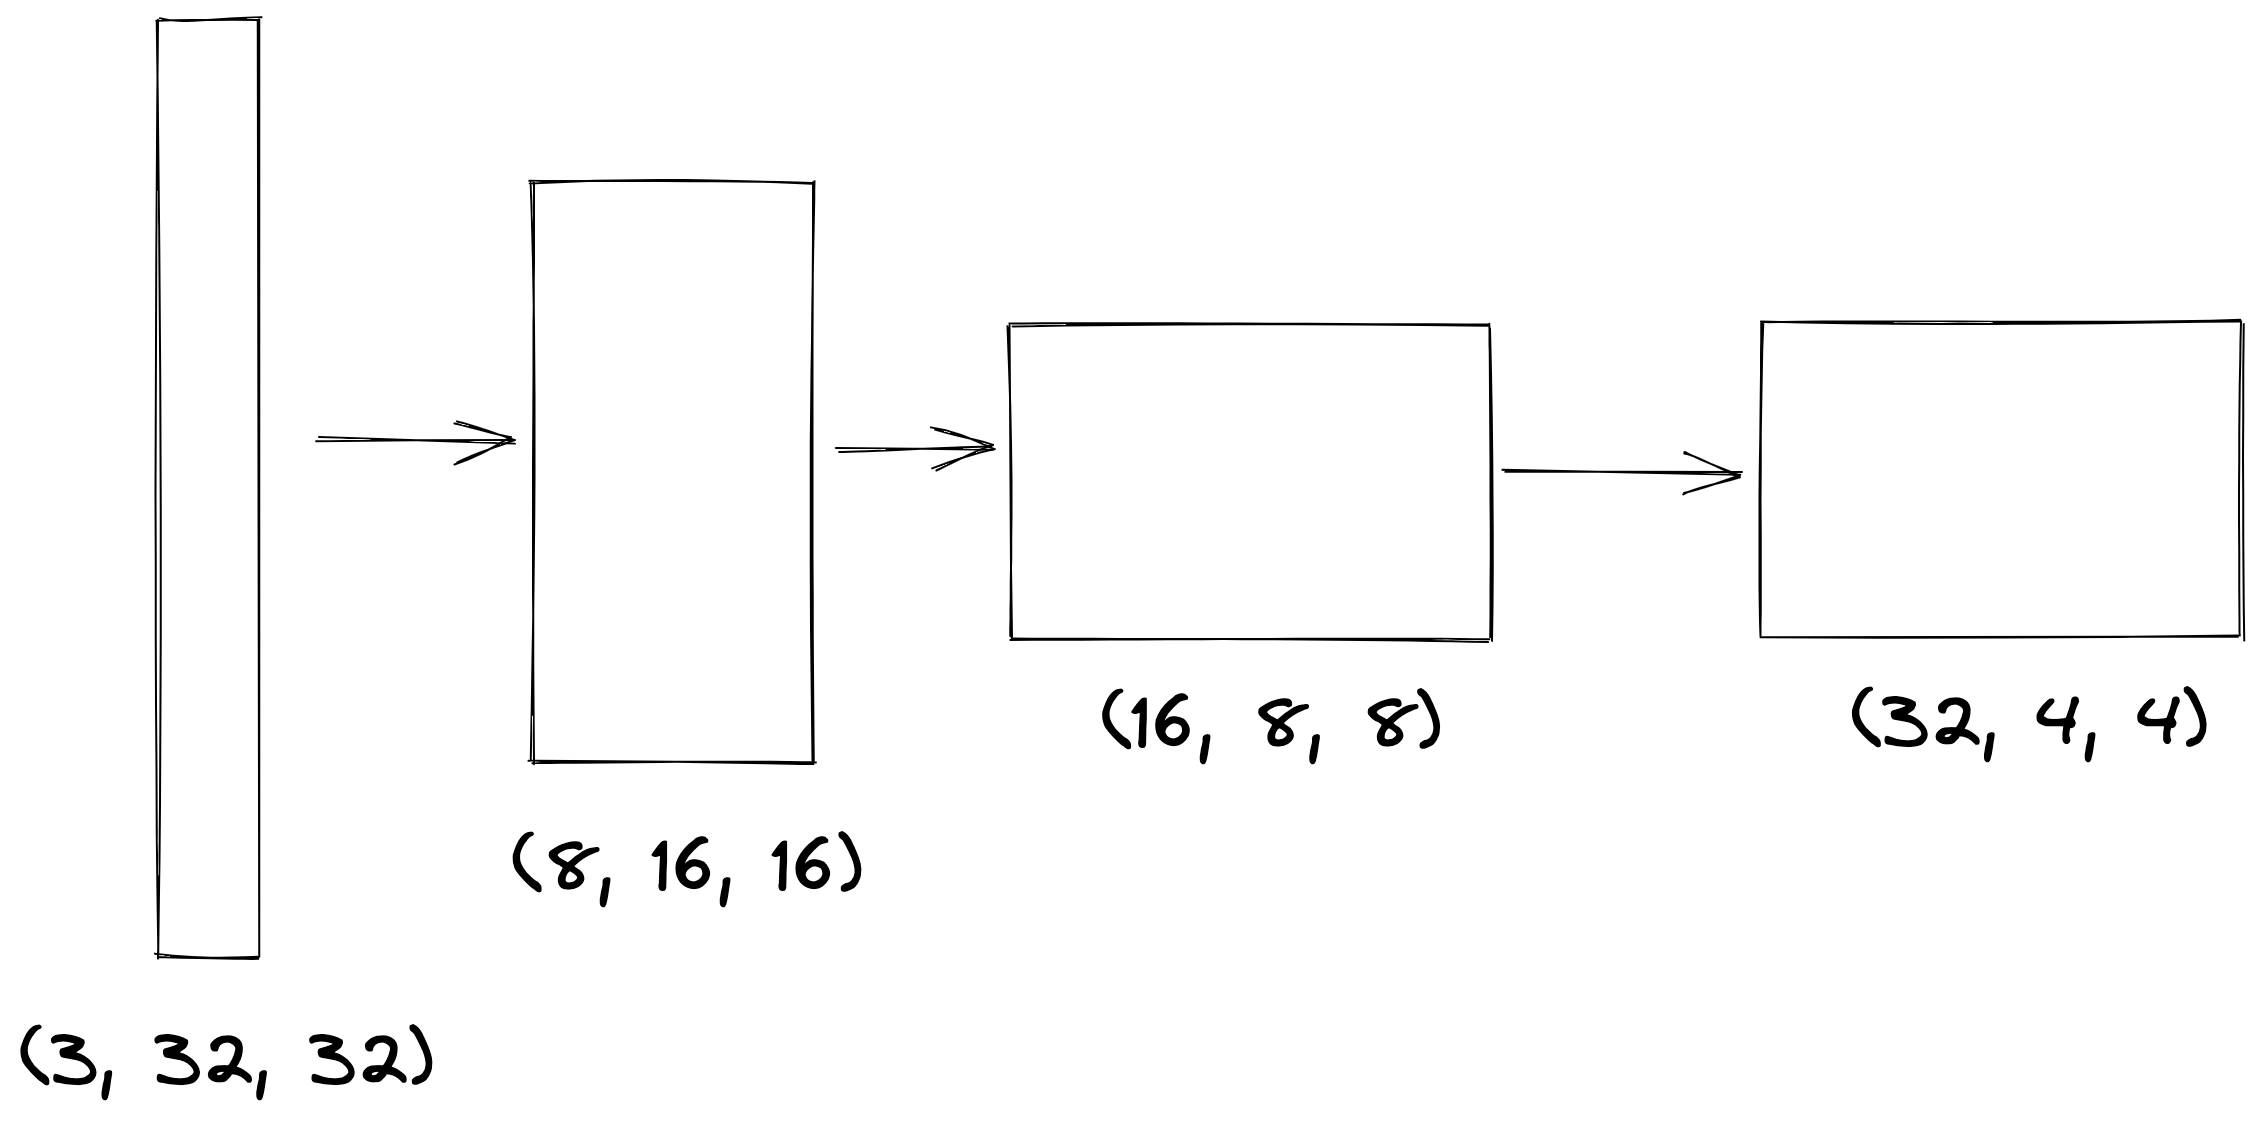

`Decoder` должен выполнять ровно обратную последовательность действий. Размер ядра, паддинги и страйды нужно устанавливать самостоятельно! При реализации помните два замечательных свойства

* `padding = kernel_size // 2` для `nn.Conv2d` делает так, что размер изображения меняется только за счет `stride`
* `kernel_size = stride` при `padding = 0` для `nn.ConvTranspose2d` делает так, что пространственный размер изображения увеличивается в `stride` раз.

In [ ]:
image_batch = torch.randn((1, 3, 32, 32))

In [ ]:
encoder = torch.nn.Sequential(
    torch.nn.Conv2d(),
    torch.nn.ReLU(),
    torch.nn.Conv2d(),
    torch.nn.ReLU(),
    torch.nn.Conv2d(),
)

In [ ]:
encoded = encoder(image_batch)
encoded.shape

In [ ]:
decoder = torch.nn.Sequential(
     torch.nn.ConvTranspose2d(),
     torch.nn.ReLU(),
     torch.nn.ConvTranspose2d(),
     torch.nn.ReLU(),
     torch.nn.ConvTranspose2d(),
)

In [ ]:
decoded = decoder(encoded)
decoded.shape

Если вы дошли до этого шага - поздравляю, вы готовы к написанию простой сети для сегментации!